<a href="https://colab.research.google.com/github/lcommons/portfolio/blob/master/policeshootings/PoliceShootings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Analysis of fatal police shootings

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
%matplotlib inline

In [31]:
#data = pd.read_csv('fatal-police-shootings-data.csv')
data = pd.read_csv('https://raw.githubusercontent.com/washingtonpost/data-police-shootings/master/v1/fatal-police-shootings-data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8002 entries, 0 to 8001
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       8002 non-null   int64  
 1   name                     7548 non-null   object 
 2   date                     8002 non-null   object 
 3   manner_of_death          8002 non-null   object 
 4   armed                    7791 non-null   object 
 5   age                      7499 non-null   float64
 6   gender                   7971 non-null   object 
 7   race                     6485 non-null   object 
 8   city                     8002 non-null   object 
 9   state                    8002 non-null   object 
 10  signs_of_mental_illness  8002 non-null   bool   
 11  threat_level             8002 non-null   object 
 12  flee                     7036 non-null   object 
 13  body_camera              8002 non-null   bool   
 14  longitude               

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8002 entries, 0 to 8001
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       8002 non-null   int64  
 1   name                     7548 non-null   object 
 2   date                     8002 non-null   object 
 3   manner_of_death          8002 non-null   object 
 4   armed                    7791 non-null   object 
 5   age                      7499 non-null   float64
 6   gender                   7971 non-null   object 
 7   race                     6485 non-null   object 
 8   city                     8002 non-null   object 
 9   state                    8002 non-null   object 
 10  signs_of_mental_illness  8002 non-null   bool   
 11  threat_level             8002 non-null   object 
 12  flee                     7036 non-null   object 
 13  body_camera              8002 non-null   bool   
 14  longitude               

In [5]:
data.describe()

,id,age,longitude,latitude
count,8002.000000,7499.000000,7162.000000,7162.000000
mean,4415.429643,37.209228,-97.040644,36.675719
std,2497.153259,12.979490,16.524975,5.379965
min,3.000000,2.000000,-160.007000,19.498000
25%,2240.250000,27.000000,-112.028250,33.480000
50%,4445.500000,35.000000,-94.315000,36.105000
75%,6579.750000,45.000000,-83.151500,40.026750
max,8696.000000,92.000000,-67.867000,71.301000


This tells us that most of the data in this dataset is categorical, and will need to be converted to numerical values to be useful.
First, lets break the date into year, month and day columns:

In [35]:
dateUhFrame = data['date'].str.split('-',expand=True)
data['year'] = dateUhFrame[0]
data['month'] = dateUhFrame[1]
data['day'] = dateUhFrame[2]

#data['year'] = data['date'].str.split('-',expand=True)[0]
#data['month'] = data['date'].str.split('-',expand=True)[1]
#data['day'] = data['date'].str.split('-',expand=True)[2]

In [7]:
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact,year,month,day
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True,2015,01,02
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True,2015,01,02
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True,2015,01,03
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True,2015,01,04
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True,2015,01,04


### Let's start to analyse the data
#### What does the data look like from year to year?

<Axes: xlabel='year', ylabel='count'>

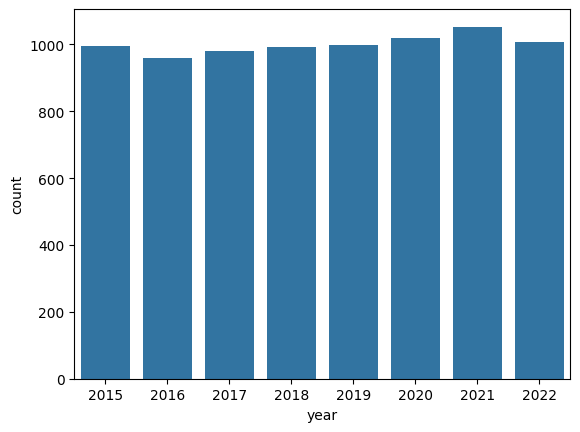

In [8]:
sns.countplot(data=data,x='year')

There is not much variation from year to year.


#### How about from month to month over the years?

<Axes: xlabel='month', ylabel='count'>

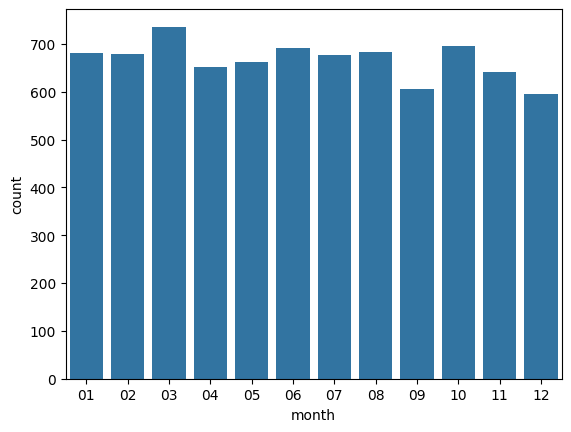

In [9]:
sns.countplot(data=data,x='month')

It looks like there might be some monthly patterns here. A peak in the summer? Decline in autumn? But what's going on in early spring?

Maybe we should ask how consistent is the monthly data from year to year? Is one month consistently high or low? Or do they vary from year to year?

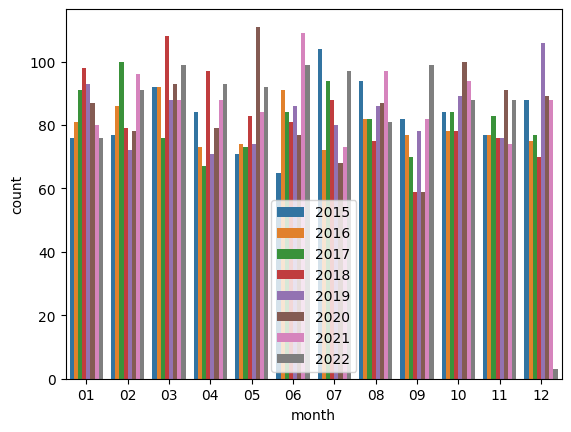

In [10]:
sns.countplot(data=data,x='month', hue='year')
plt.legend(loc='lower center')

That makes it look like there is a lot of variation, each month, from year to year. July is the highest month one year, but the lowest another! March was really bad one year, but about average other years.

Maybe it would be easier to see the monthly data for each year:

Text(0.5, 1.0, '2022')

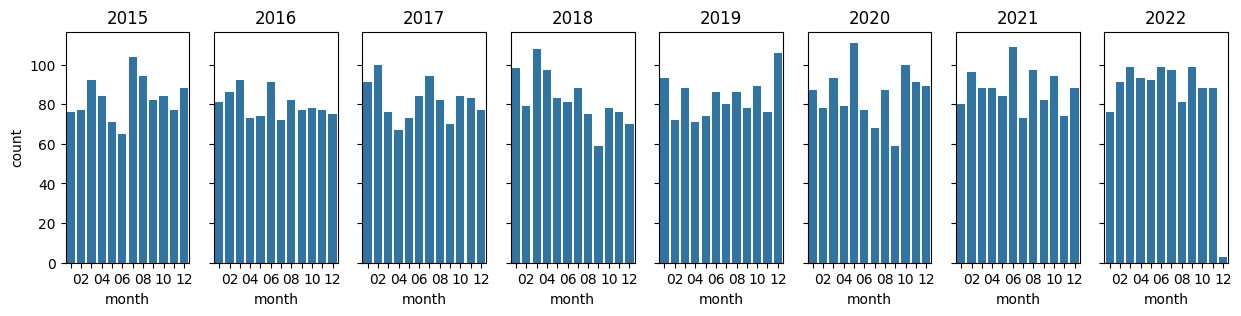

In [39]:
df15 = data[data['year']=='2015']
df16 = data[data['year']=='2016']
df17 = data[data['year']=='2017']
df18 = data[data['year']=='2018']
df19 = data[data['year']=='2019']
df20 = data[data['year']=='2020']
df21 = data[data['year']=='2021']
df22 = data[data['year']=='2022']
fig, ax = plt.subplots(1, 8, figsize=(15, 3), sharey=True)

# for p in range(8):
#   sns.countplot(data=data[data['year']==str(2015+p)], ax=ax[p],x='month')
#   ax[p].set_title(p+2015)


plot1 = sns.countplot(data=df15, ax=ax[0],x='month')
for label in plot1.get_xticklabels():
    if float(label.get_text()) % 2 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)
plot2 = sns.countplot(data=df16, ax=ax[1],x='month')
for label in plot2.get_xticklabels():
    if float(label.get_text()) % 2 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

plot3 = sns.countplot(data=df17, ax=ax[2],x='month')
for label in plot3.get_xticklabels():
    if float(label.get_text()) % 2 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

plot4 = sns.countplot(data=df18, ax=ax[3],x='month')
for label in plot4.get_xticklabels():
    if float(label.get_text()) % 2 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

plot5 = sns.countplot(data=df19, ax=ax[4],x='month')
for label in plot5.get_xticklabels():
    if float(label.get_text()) % 2 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

plot6 = sns.countplot(data=df20, ax=ax[5],x='month')
for label in plot6.get_xticklabels():
    if float(label.get_text()) % 2 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

plot7 = sns.countplot(data=df21, ax=ax[6],x='month')
for label in plot7.get_xticklabels():
    if float(label.get_text()) % 2 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

plot8 = sns.countplot(data=df22, ax=ax[7],x='month')
for label in plot8.get_xticklabels():
    if float(label.get_text()) % 2 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

ax[0].set_title('2015')
ax[1].set_title('2016')
ax[2].set_title('2017')
ax[3].set_title('2018')
ax[4].set_title('2019')
ax[5].set_title('2020')
ax[6].set_title('2021')
ax[7].set_title('2022')

A few things stand out to me with this presentation. First, there really is a peak in June or July most years. I have this image of a long hot summer leading to social unrest, violence, and conflict... but June/July seems early for a long hot summer. What gives?

Also, what's with march madness? In some years, March is a local maxima. WTF? Cabin fever?

This leads to some further questions to look at: state by month: when it gets HOT in the summer, are there more shootings? When it gets COLD in the winter, are there more shootings?


#### Now let's look at the data by age

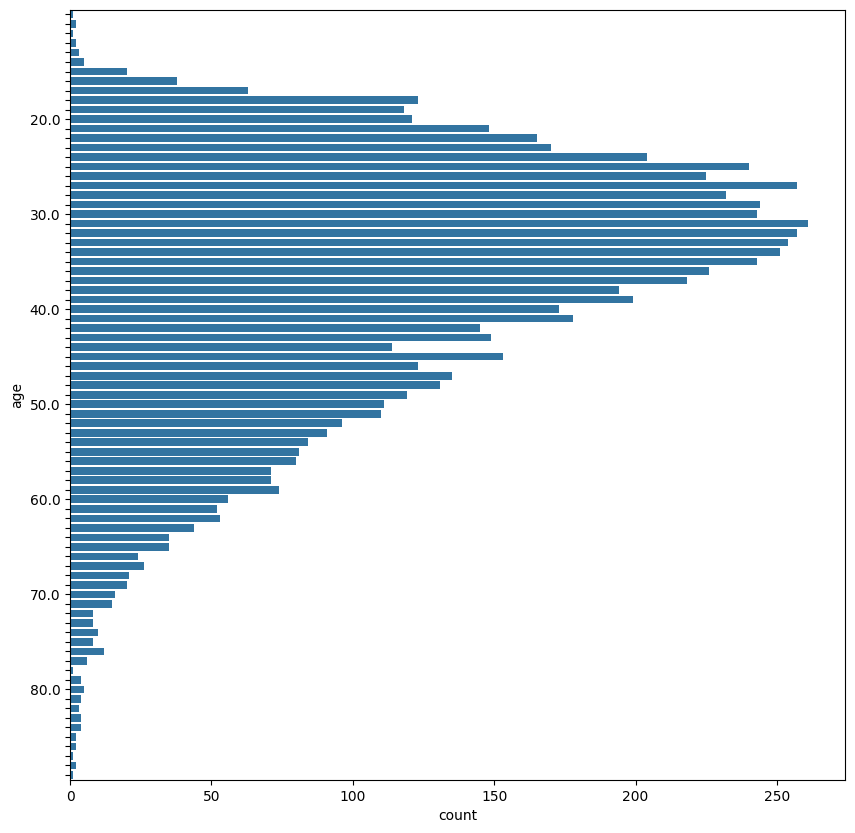

In [19]:
plt.figure(figsize=(10,10))
#sns.countplot(data=data[data['gender']=='F'],y='age')
plot = sns.countplot(data=data,y='age')
#ax.set_xticklabels(ax.get_xticklabels(), fontsize=5)
for label in plot.get_yticklabels():
    if float(label.get_text()) % 10 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

It is not a surprise that the peak age of police shooting victims is in the early twenties. I am a bit surprised that the numbers are so high well into the thirties.
In terms of absolute numbers, that's where the action is: 20-40 year old (men?) are the overwhelming majority of victims of police shootings.
But...
I don't even know how to think about the non-zero data for six year olds. Oh, wait. its not one. There are TWO six year olds in this database.

And what's with all the sixty year olds? I guess I hope when I am sixty-something I will be spry and agile, and may look threatening enough to justify ... no never mind... forget I said that. But what about all the seventy year olds? and the eighty year olds? Ninety one?



### OK, what about gender?

Let's look at the age histogram, and seperate shootings by gender.

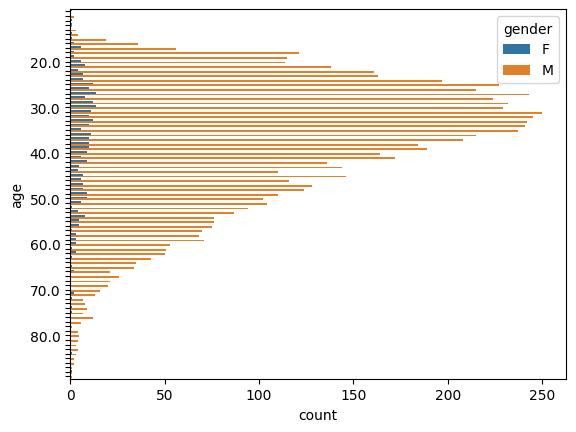

In [18]:
plot = sns.countplot(data=data,y='age',hue='gender')
#plot.yaxis.set_major_locator(ticker.LinearLocator(10))
#new_ticks = [i.get_text() for i in plot.get_xticklabels()]
#plt.xticks(range(0, len(new_ticks), 10), new_ticks[::10])
for label in plot.get_yticklabels():
    if float(label.get_text()) % 10 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

### woh

Lets look at the age histogram, seperated by gender, side by side.

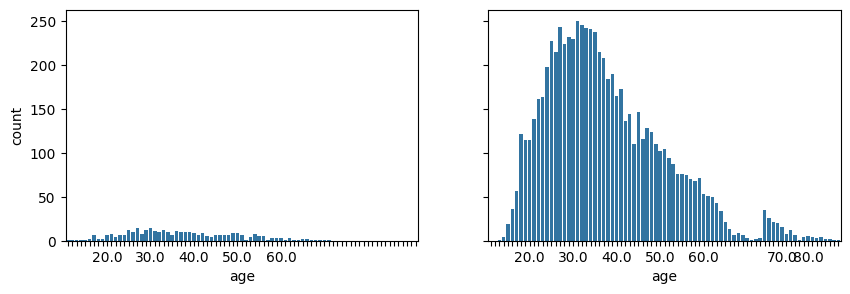

In [21]:
dfF = data[data['gender']=='F']
dfM = data[data['gender']=='M']
fig, ax = plt.subplots(1, 2, figsize=(10, 3), sharey=True,sharex=True)

plot1 = sns.countplot(data=dfF, ax=ax[0],x='age')
for label in plot1.get_xticklabels():
    if float(label.get_text()) % 10 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)
plot2 = sns.countplot(data=dfM, ax=ax[1],x='age')
for label in plot2.get_xticklabels():
    if float(label.get_text()) % 10 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

Those two histograms look strikingly different! The one on the right looks familiar (see above). Let's zoom in on the age histogram for females.

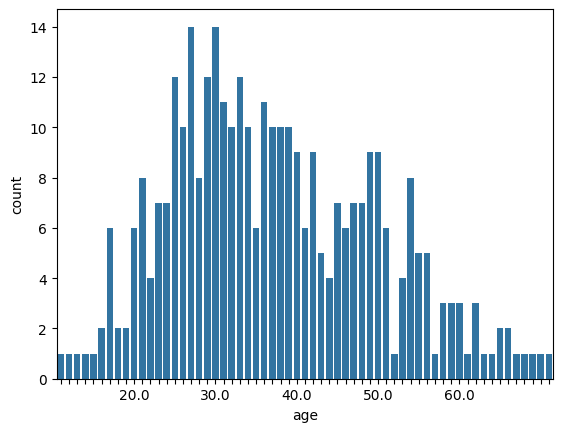

In [22]:
plot = sns.countplot(data=dfF,x='age')
for label in plot.get_xticklabels():
    if float(label.get_text()) % 10 == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

To state the obvious, notice how much more distributed the age histogram is. Being a young woman isn't nearly as dangerous as being a young man. This is not to say that any of these shootings are more or less tragic. The fact that middle-aged women are killed by police at about the same rate as young women can not be spun as a good-news story! Notice that the Y-axis is numbered in the single digits.

In [16]:
data['age'].value_counts().sort_index()

,count
age,
2.0,1
6.0,2
8.0,1
12.0,2
13.0,3
...,...
86.0,2
88.0,2
89.0,1


## Mental Illness
What does the signs_of_mental_illness field tell us?

In [17]:
data['signs_of_mental_illness'].value_counts()

,count
signs_of_mental_illness,
False,6331
True,1671


<Axes: xlabel='signs_of_mental_illness', ylabel='count'>

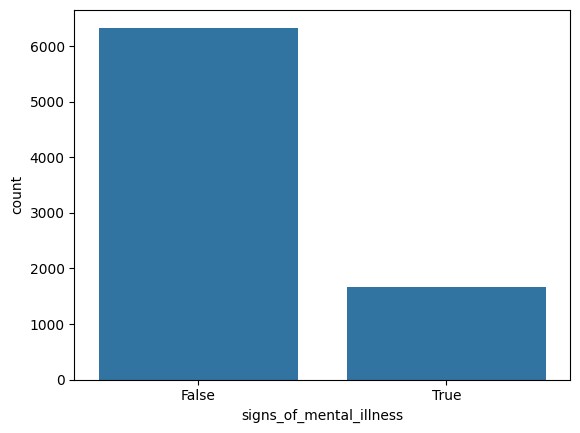

In [18]:
sns.countplot(data=data,x='signs_of_mental_illness')

Or, more easily interpretable:

([<matplotlib.patches.Wedge at 0x7a153f6dd930>,
 [Text(-0.8716579658173128, 0.6709786812017388, ''),
  Text(0.8716579972280907, -0.6709786403964838, '')])

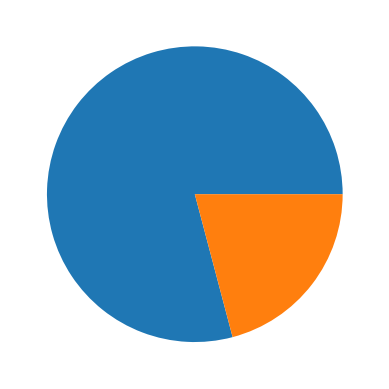

In [19]:
plt.pie(data['signs_of_mental_illness'].value_counts())
#plt.title('Relative Feature Importance')

A first observation: nearly a quarter of all shooting victims show signs of mental illness. It would be interesting to compare this to the general population. My suspicion is that signs of mental illness appear in shooting victims at a much higher rate than the population at large.